In [177]:
from konlpy.tag import Okt
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
#제목 및 본문 txt에 저장
total_contents = titles + contents
text = open('C:/project/CODE/keyword/data/naver_top_500/blog/' + yesterday + '_blog_text.txt','w',encoding='UTF-8')
for i in total_contents:
    text.write(i)
text.close()

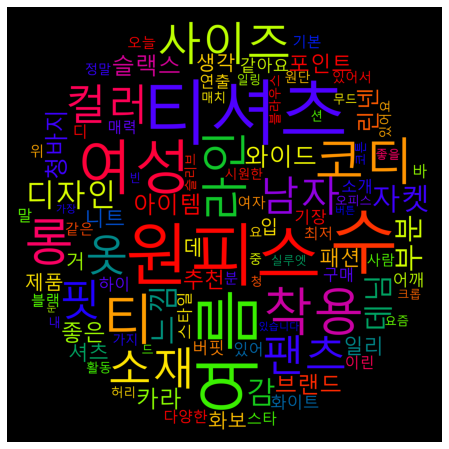

In [178]:
# text 파일 읽어오기
blog_text = open('C:/project/CODE/keyword/data/naver_blog/' + yesterday + '_blog_text.txt','rt', encoding='UTF-8').read()
#print(blog_text)

# Okt 함수를 이용해 형태소 분석
okt = Okt()
line =[]

line = okt.pos(blog_text)

n_adj =[]
# 명사 또는 형용사인 단어만 n_adj에 넣어주기
for word, tag in line:
    if tag in ['Noun','Adjective']:
        n_adj.append(word)

        
# 불용어 사전
f = open("C:/project/CODE/keyword/data/stopwords/stopwords_korean.txt", "rt", encoding="utf-8")
lines = f.readlines() #txt 읽을 때 \n 제거
stop_words = []
for line in lines:
    line = line.replace('\n', '')
    stop_words.append(line)
f.close()
# stop_words

n_adj = [word for word in n_adj if not word in stop_words]

# print(line)
#print(n_adj)

#가장 많이 나온 단어 100개 저장
counts = Counter(n_adj)
tags = counts.most_common(100)


# 이미지 추가(워드 클라우드 모양 설정)

mask = Image.new("RGBA",(2500,2500), (255,255,255)) #(2500,2500) = 이미지 크기, (255,255,255) = RGB
image = Image.open('C:/project/CODE/keyword/data/images/circle.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
mask = np.array(mask)

### 워드 클라우드 생성 ###
#폰트지정
# sns.set(style='darkgrid', font='NanumGothic', font_scale=1.2)
font='C:/Users/User/AppData/Local/Microsoft/Windows/Fonts/MALGUN.ttf'
word_cloud = WordCloud(font_path=font, background_color='black',max_font_size=400, mask=mask,colormap='prism').generate_from_frequencies(dict(tags))


# 사이즈 설정 및 화면에 출력
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
#워드클라우드 사진으로 저장
#cloud.to_file('네이버_키워드_블로그_워드클라우드.png')
#또는
plt.savefig('C:/project/CODE/keyword/data/naver_top_500/blog/' + yesterday + '_네이버_키워드_블로그_워드클라우드.png', bbox_inches='tight')
plt.show()

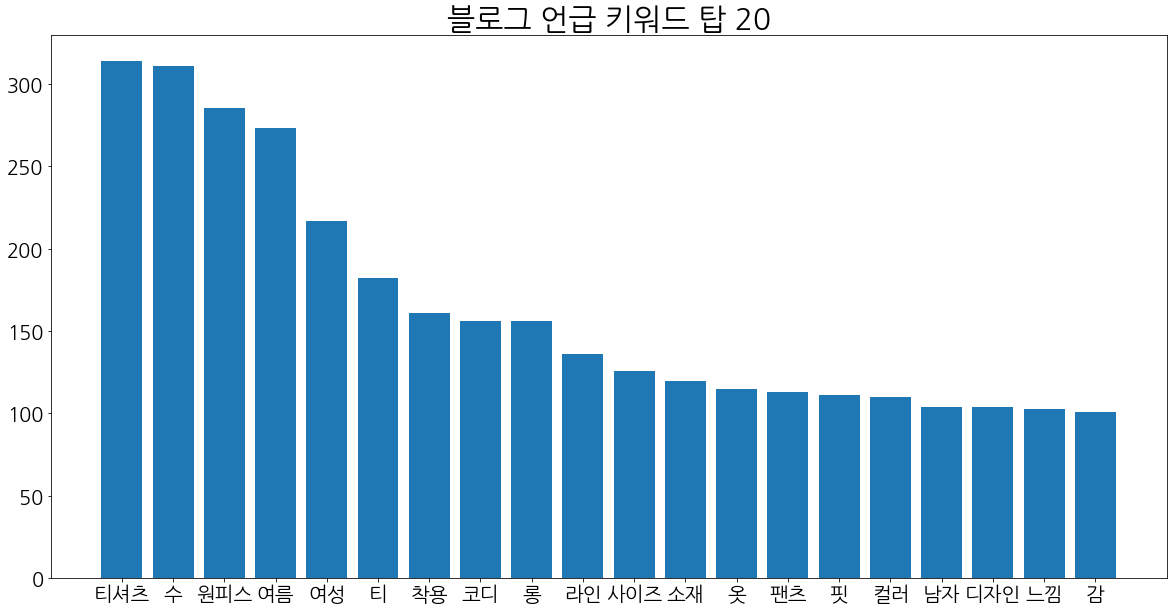

In [179]:
chartdata = pd.DataFrame(tags[:20])
xtick = chartdata[0].to_list()
ytick = chartdata[1].to_list()

plt.rc('font', family='NanumGothic')
plt.figure(figsize=(20,10))
plt.rc('font', size=20) 
plt.title('블로그 언급 키워드 탑 20', fontsize=30)
plt.bar(xtick, ytick)
plt.show()
